<a href="https://colab.research.google.com/github/kapilsharma2285/Python_Fundamentals_B13/blob/master/Data_mining_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

In [39]:
# import library for HTTP requests
import requests  

# Get the state wise data from "https://api.covid19india.org/csv/"
url_covid19 = 'https://api.covid19india.org/csv/latest/state_wise_daily.csv'  

# Get Data from URL
data = requests.get(url_covid19, allow_redirects=True)

# Save the file locally
open('state_wise_daily.csv', 'wb').write(data.content)

33221

In [40]:
# Read the data and update the index as "Date" column. Also, read the date column as "DateTime"
covid19_data_df = pd.read_csv("state_wise_daily.csv", parse_dates=["Date"])
covid19_data_df = covid19_data_df[covid19_data_df['Date'] <= '2020-05-25']
print(covid19_data_df.shape)

(219, 41)


In [41]:
copy0_covid19_data_df = covid19_data_df.copy()

In [42]:
copy0_covid19_data_df = pd.melt(copy0_covid19_data_df, id_vars = ['Date', 'Status'], value_vars = ['TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DN',
       'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA', 'LD',
       'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK', 'TN',
       'TG', 'TR', 'UP', 'UT', 'WB', 'UN'], var_name = 'State')

In [43]:
copy0_covid19_data_df=copy0_covid19_data_df.pivot_table(index=['Date', 'State'], columns='Status', values='value', aggfunc='first').reset_index().rename_axis(None, axis=1)


In [44]:
# Removing the 'TT' from the State i.e sum of all states count
copy0_covid19_data_df = copy0_covid19_data_df[copy0_covid19_data_df['State'] != 'TT']

In [45]:
# Group different cases(Confirmed, Recovered and Deceased) as per Date
datewise=copy0_covid19_data_df.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deceased":'sum'})

In [46]:
# import plotly library for graph
import plotly.graph_objects as go

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"],
                    mode='lines+markers',
                    name='Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"],
                    mode='lines+markers',
                    name='Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deceased"],
                    mode='lines+markers',
                    name='Death Cases'))
fig.update_layout(title="Growth of different types of cases in India",
                 xaxis_title="Date",yaxis_title="Number of Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

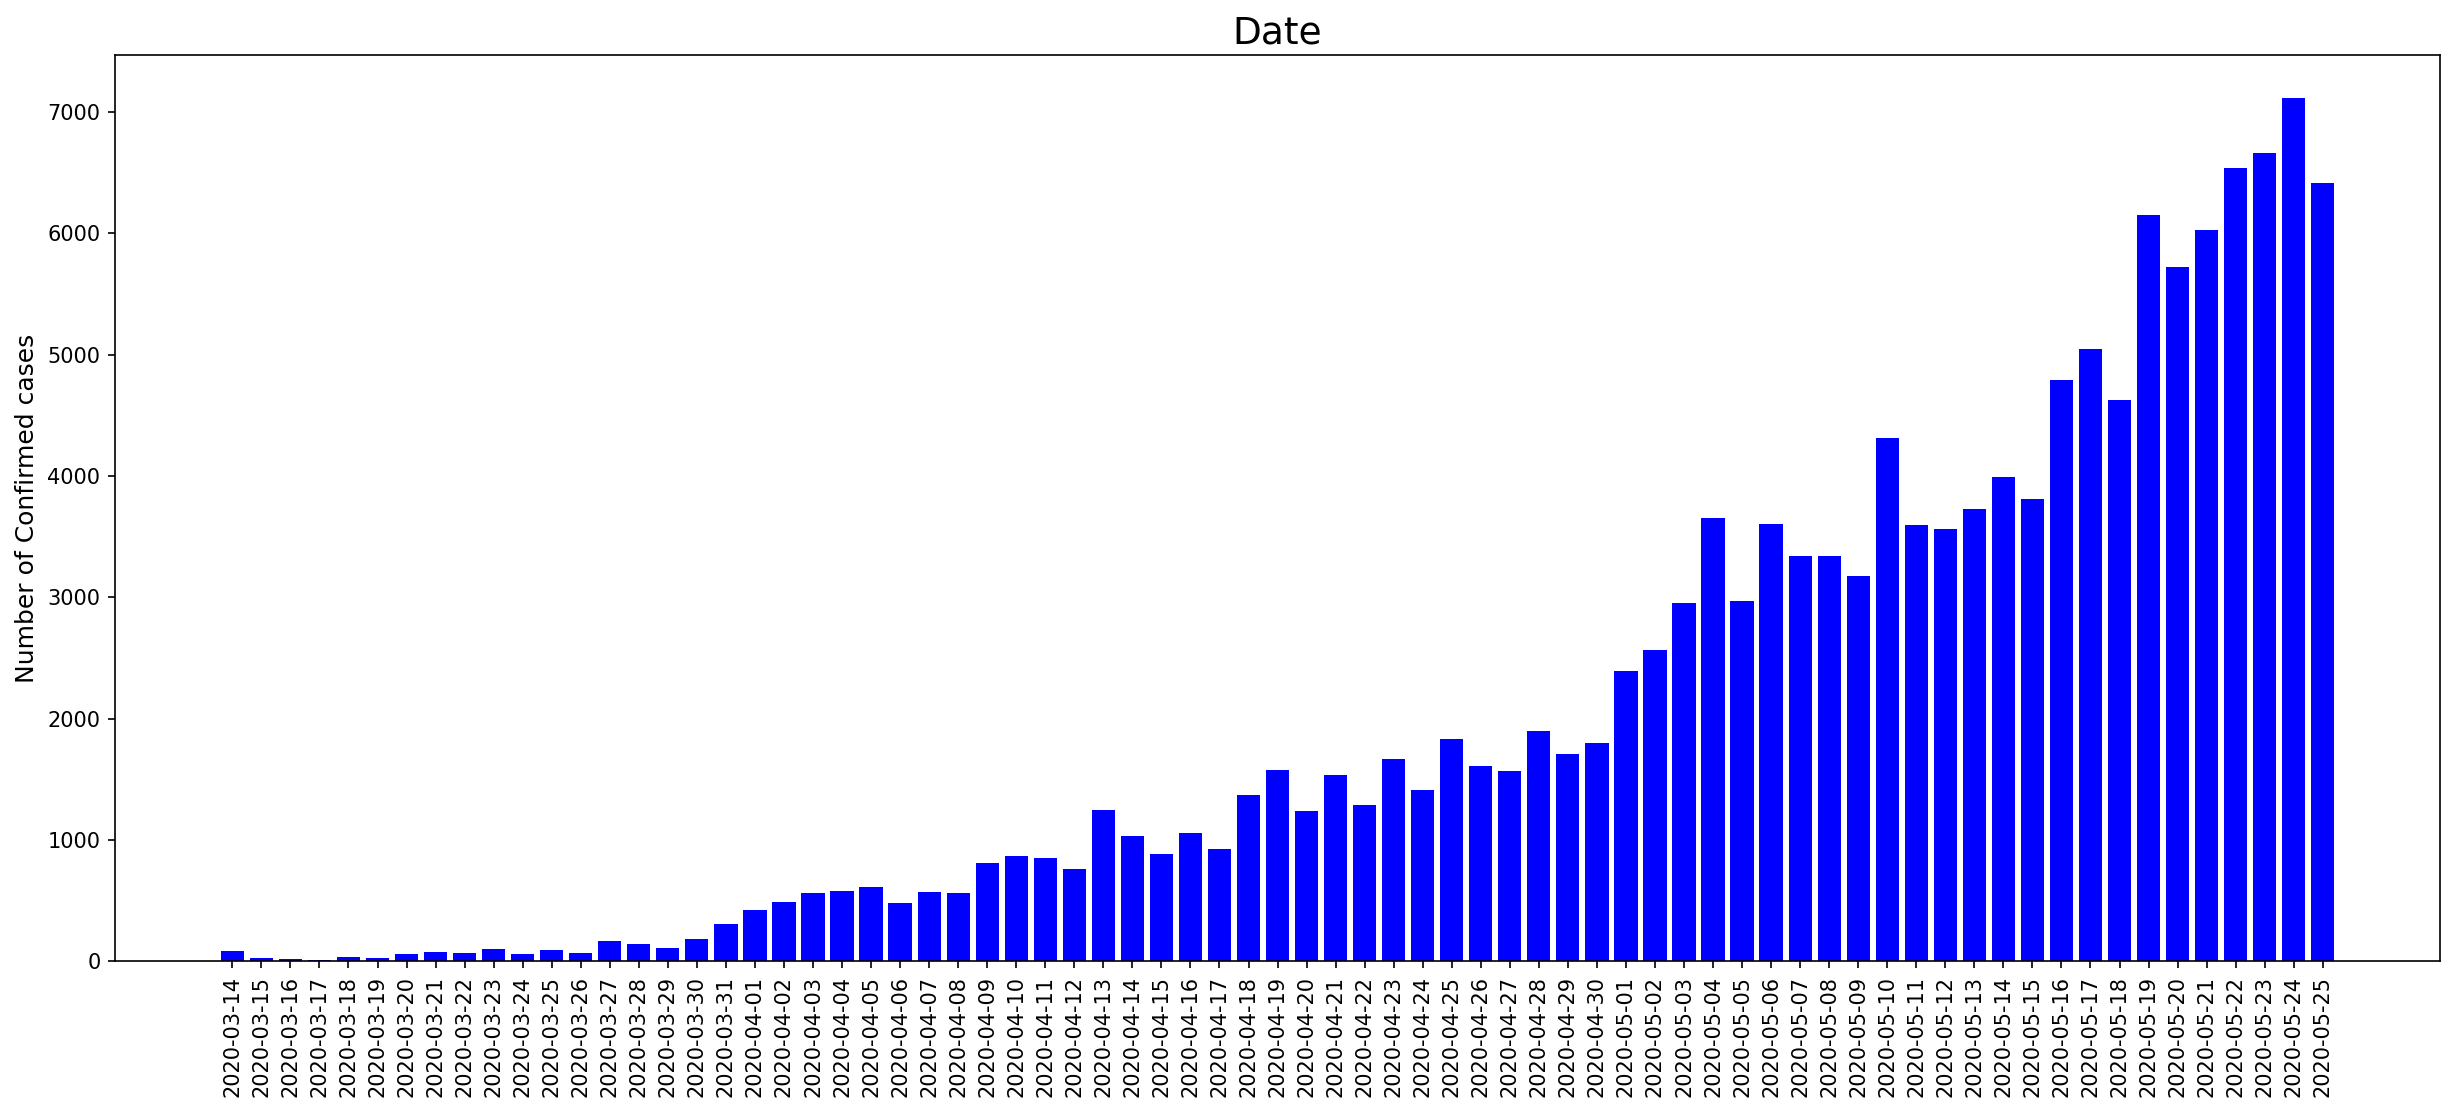

In [47]:
covid19_data_df_sol3 = covid19_data_df.copy()
covid19_data_df_sol3 = covid19_data_df_sol3[['Date','Status', 'TT']]
covid19_data_df_sol3_Confirmed= covid19_data_df_sol3[covid19_data_df_sol3['Status'] == 'Confirmed']
covid19_data_df_sol3_Recovered= covid19_data_df_sol3[covid19_data_df_sol3['Status'] == 'Recovered']
covid19_data_df_sol3_Deceased= covid19_data_df_sol3[covid19_data_df_sol3['Status'] == 'Deceased']
plt.figure(figsize=(20,8), dpi=150)
plt.bar(covid19_data_df_sol3_Confirmed['Date'], covid19_data_df_sol3_Confirmed['TT'], align='center',color='blue')
plt.ylabel('Number of Confirmed cases', size = 12)
plt.xticks(covid19_data_df_sol3_Confirmed['Date'], rotation=90)
plt.title('Date', size = 18)
plt.show()

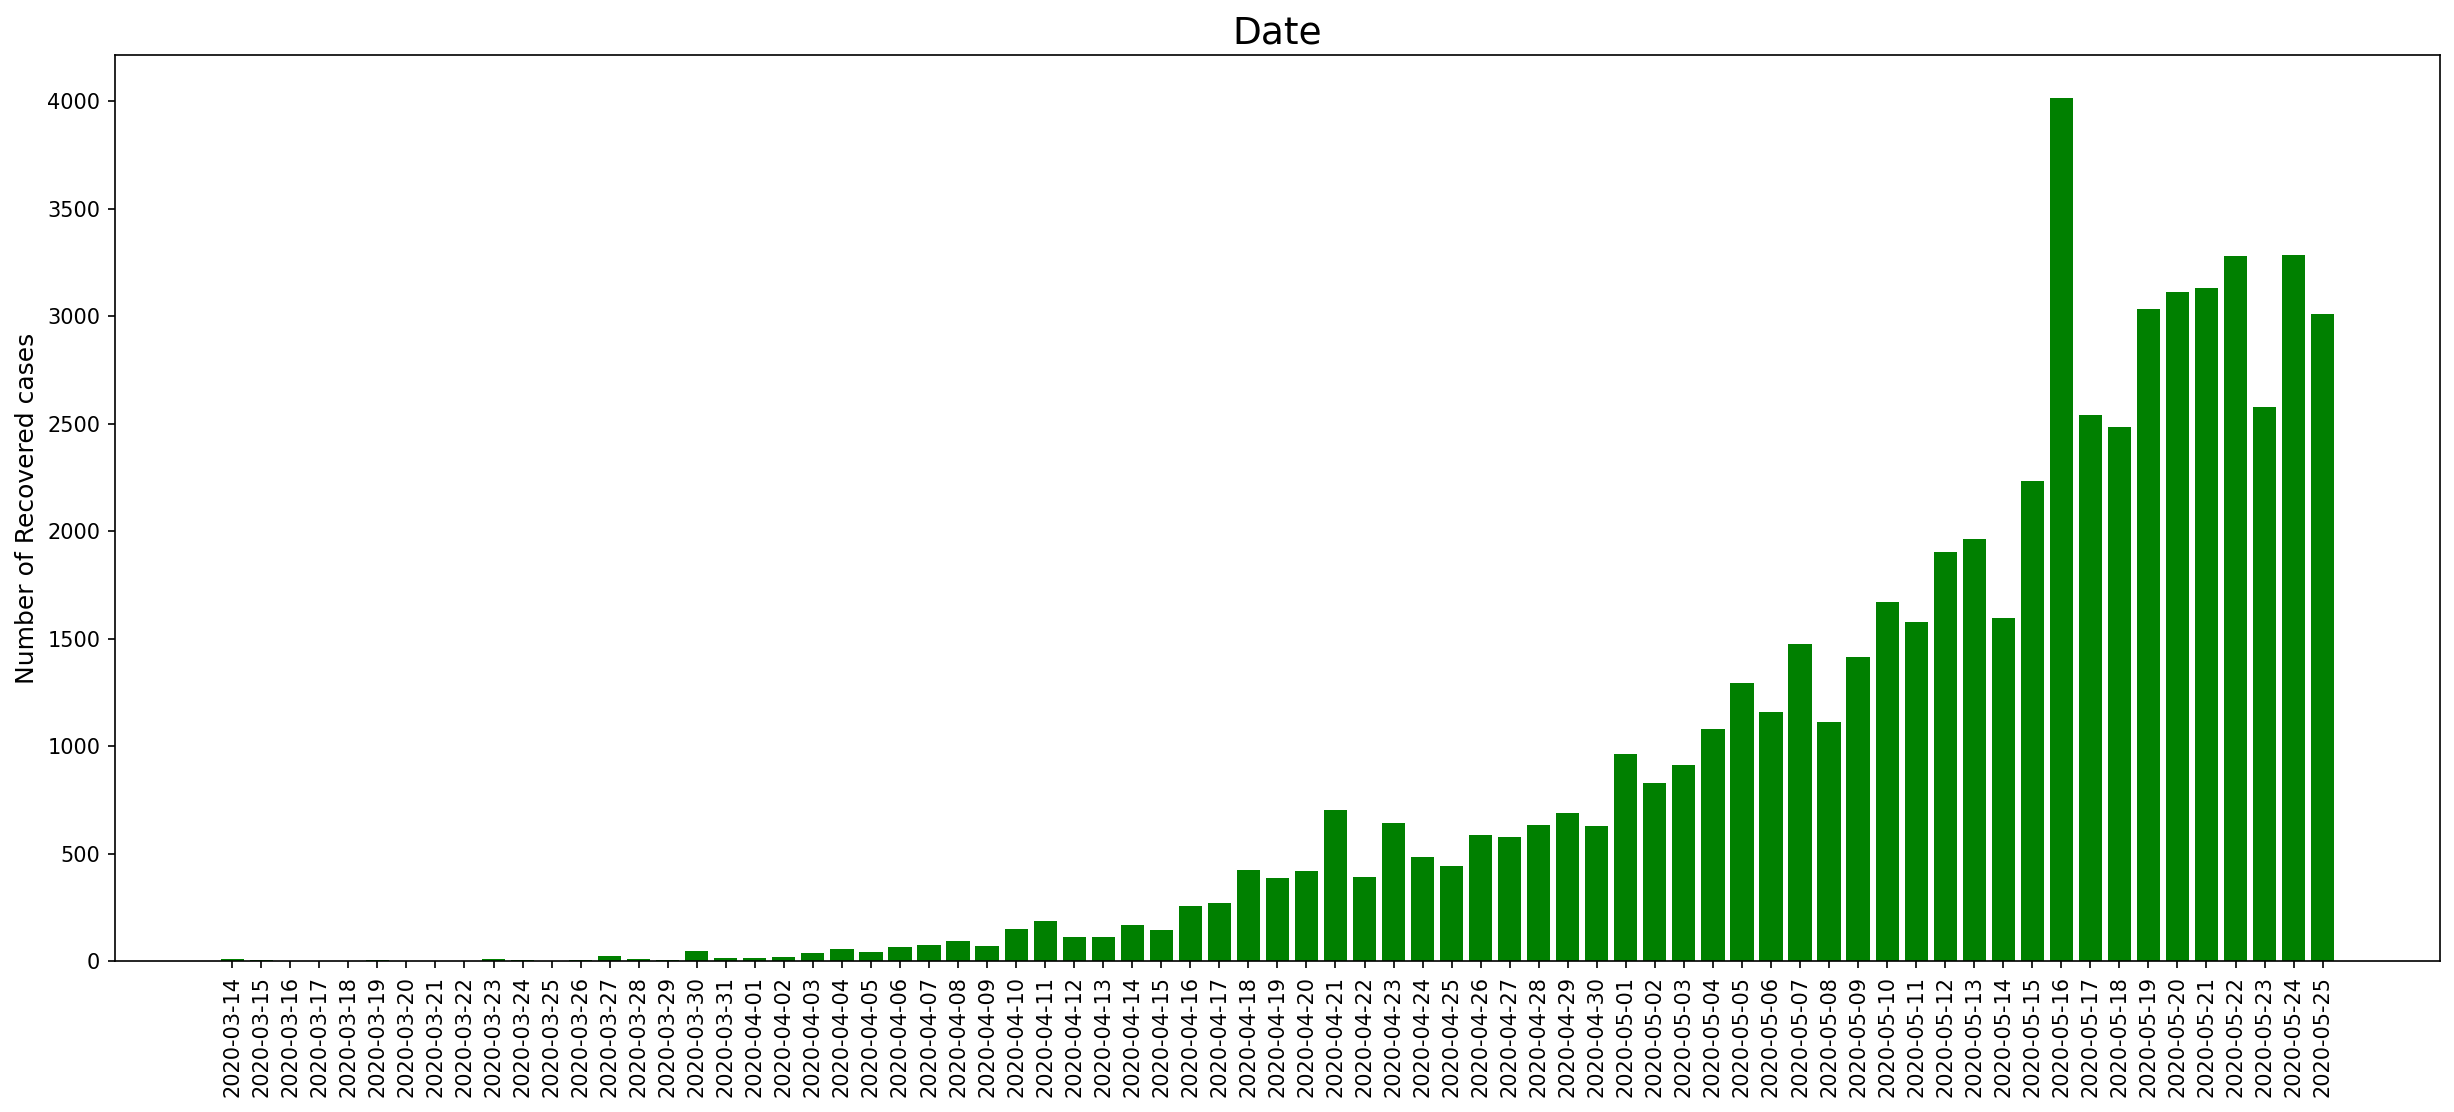

In [48]:
plt.figure(figsize=(20,8), dpi=150)
plt.bar(covid19_data_df_sol3_Recovered['Date'], covid19_data_df_sol3_Recovered['TT'], align='center',color='green')
plt.ylabel('Number of Recovered cases', size = 12)
plt.xticks(covid19_data_df_sol3_Recovered['Date'], rotation=90)
plt.title('Date', size = 18)
plt.show()

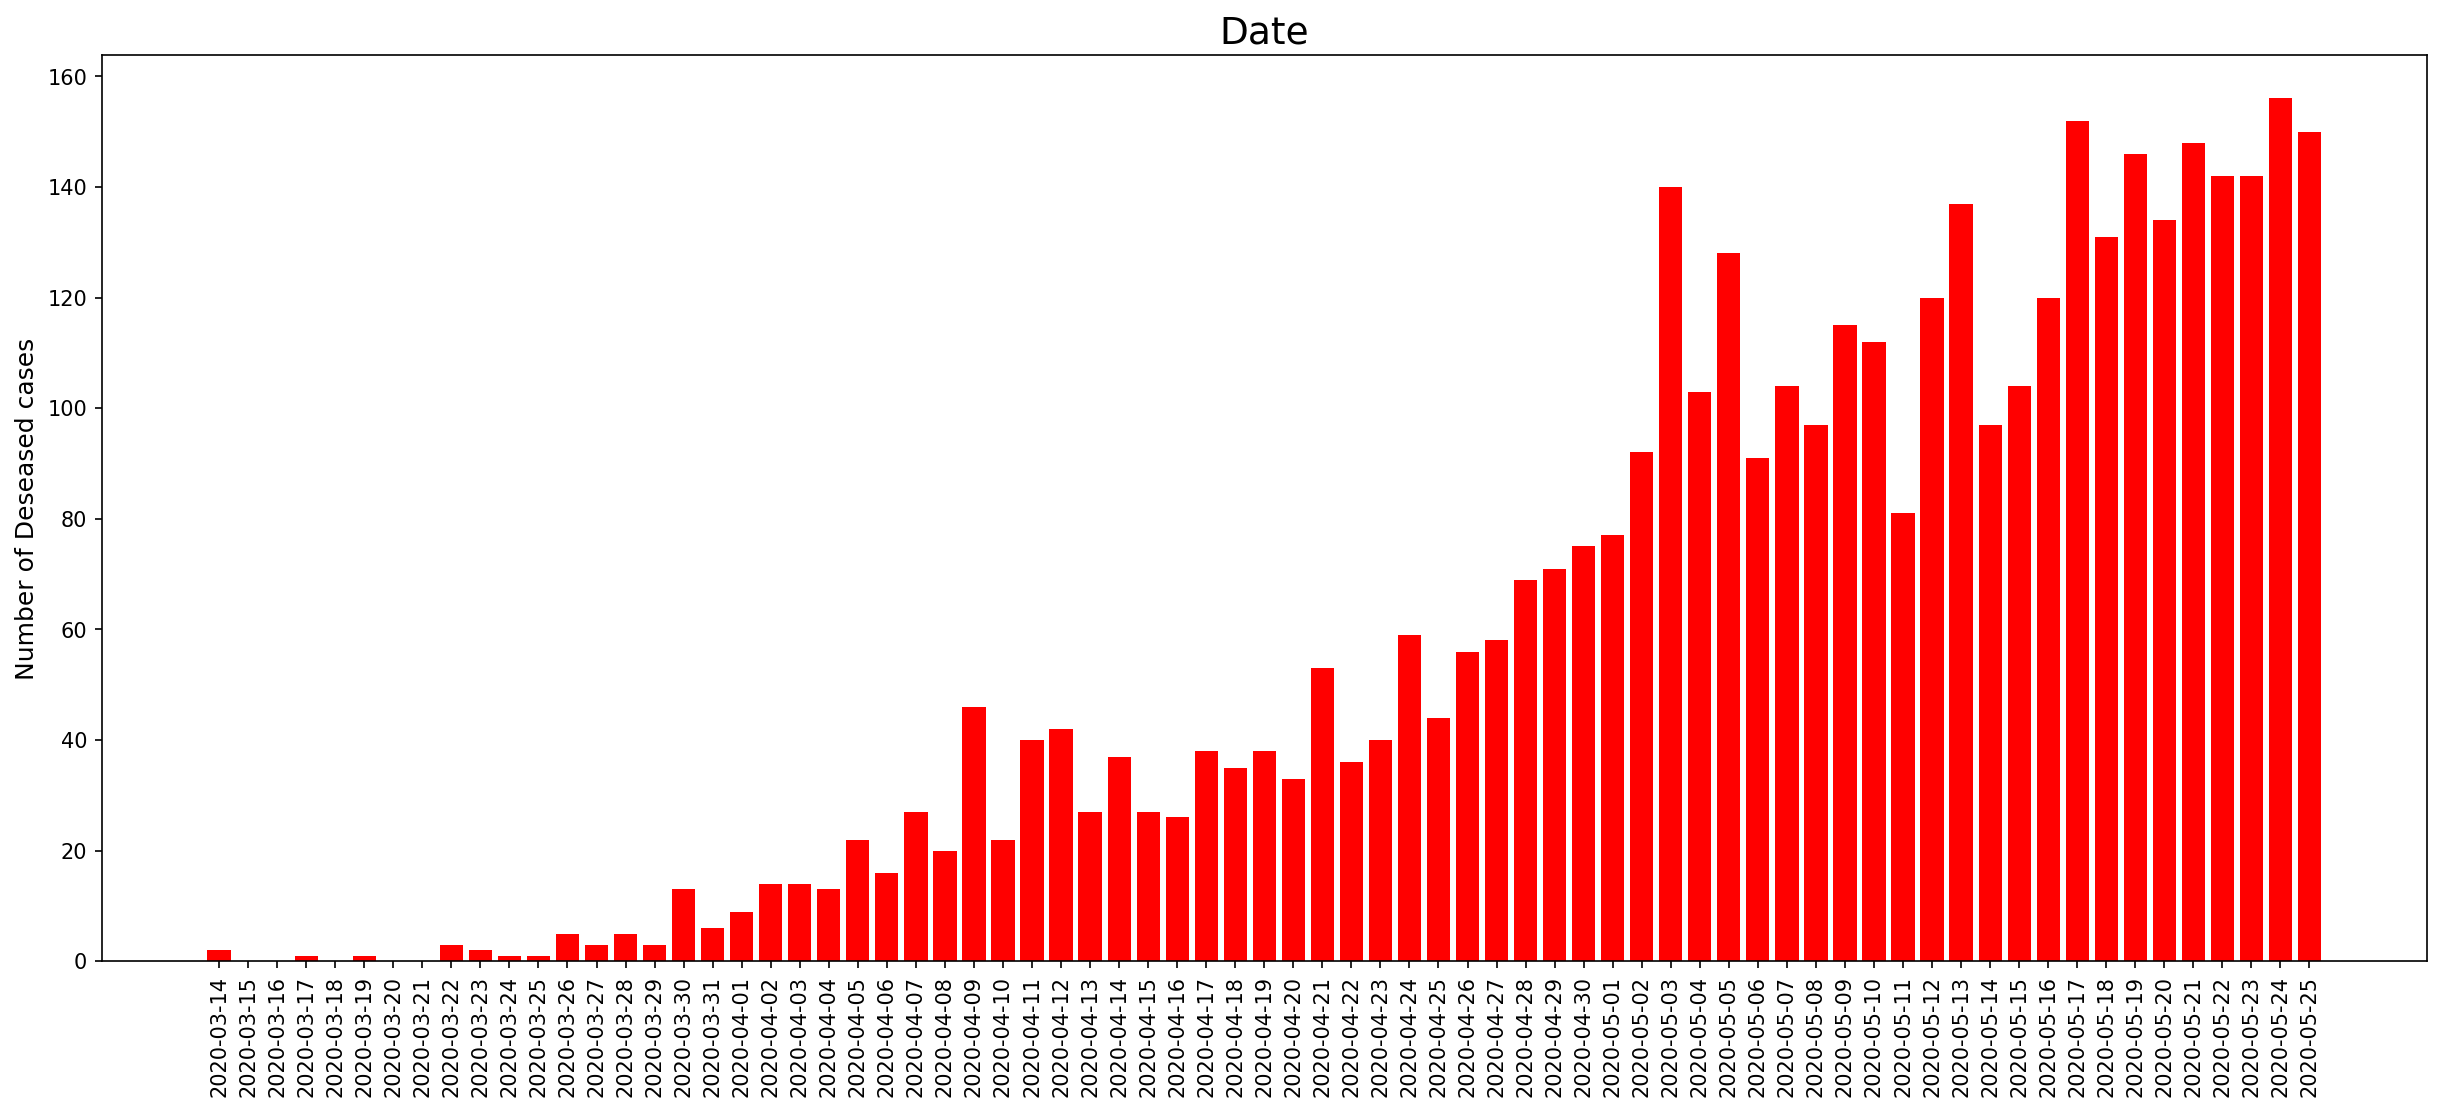

In [49]:
plt.figure(figsize=(20,8), dpi=150)
plt.bar(covid19_data_df_sol3_Deceased['Date'], covid19_data_df_sol3_Deceased['TT'], align='center',color='red')
plt.ylabel('Number of Deseased cases', size = 12)
plt.xticks(covid19_data_df_sol3_Deceased['Date'], rotation=90)
plt.title('Date', size = 18)
plt.show()

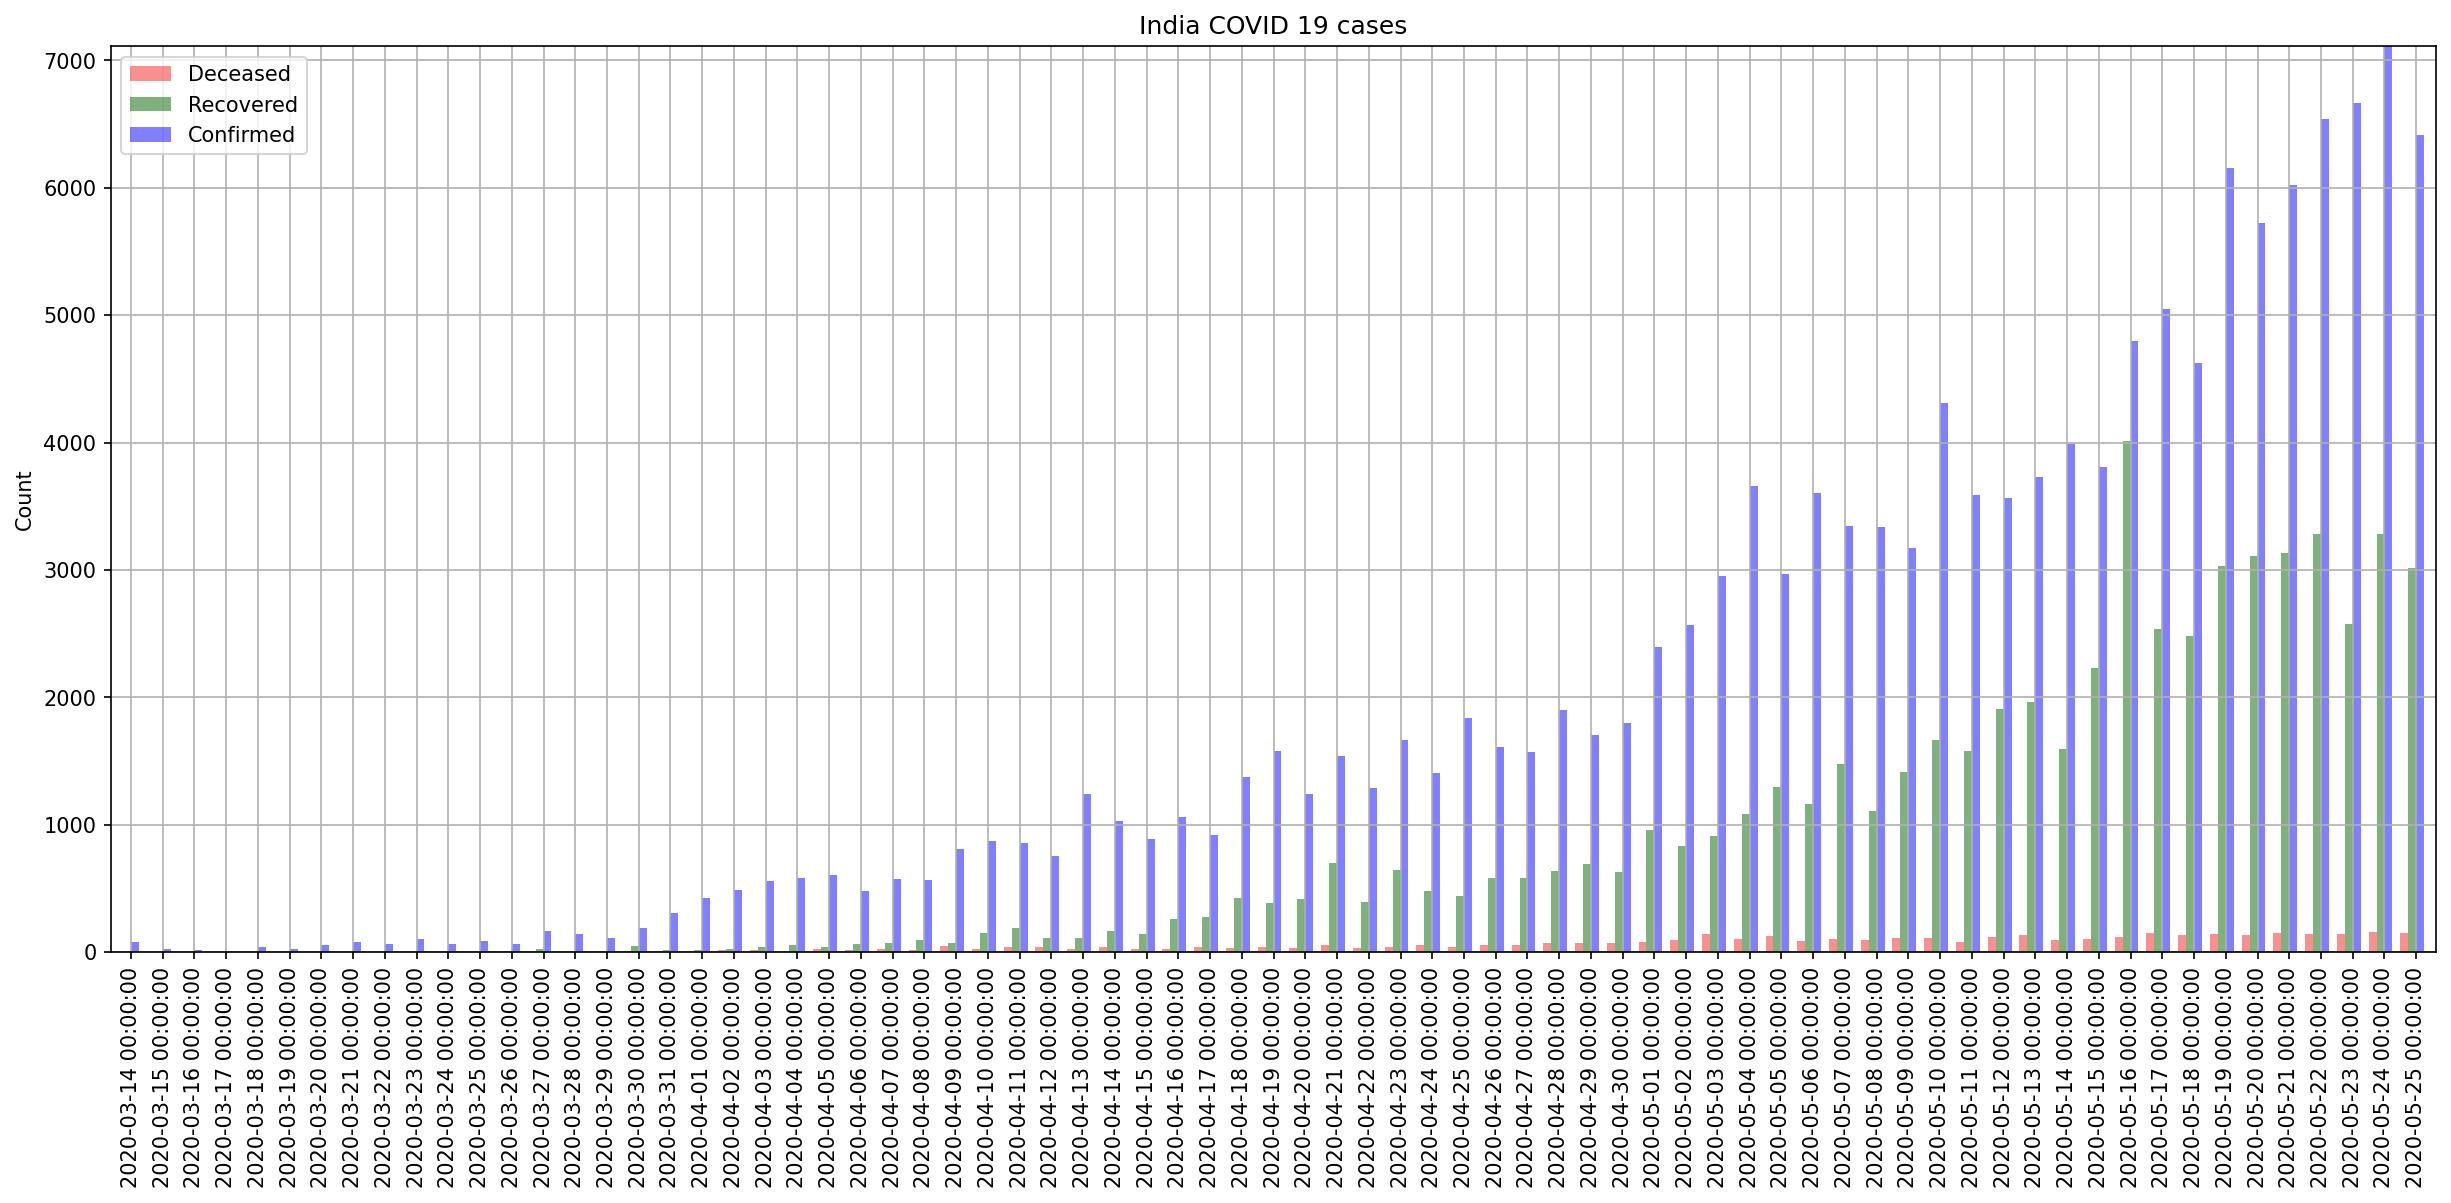

In [50]:
# Setting the positions and width for the bars
pos = list(range(len(covid19_data_df_sol3_Deceased['TT']))) 
width = 0.25 
    
# Plotting the bars
fig, axis = plt.subplots(figsize=(20,8), dpi=150)

# Create a bar with covid19_data_df_sol3_Deceased data
plt.bar(pos, 
        covid19_data_df_sol3_Deceased['TT'], 
        # width
        width, 
        # alpha 0.5
        alpha=0.5, 
        # color
        color='#F7221E', 
        label= 'Deceased') 

# Create a bar with covid19_data_df_sol3_Recovered data,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        covid19_data_df_sol3_Recovered['TT'],
        # width
        width, 
        # alpha 0.5
        alpha=0.5, 
        # color
        color='#006400', 
        label='Recovered') 

# Create a bar with covid19_data_df_sol3_Confirmed data
plt.bar([p + width*2 for p in pos], 
        #using df['post_score'] data,
       covid19_data_df_sol3_Confirmed['TT'], 
        width, 
        # alpha 0.5
        alpha=0.5, 
        # color
        color= '#0000FF', 
        label='Confirmed') 

# Set the y axis label
axis.set_ylabel('Count')

# Set the chart's title
axis.set_title('India COVID 19 cases')

# Set the position of the x ticks
axis.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
axis.set_xticklabels(covid19_data_df_sol3_Deceased['Date'], rotation=90)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(covid19_data_df_sol3_Confirmed['TT'])] )

# Add legend and showing the plot
plt.legend(['Deceased', 'Recovered', 'Confirmed'], loc='upper left')
plt.grid()
plt.show()

5 clusters of States where the COVID-19 situation is similar in nature


In [23]:
datewise.to_csv("state_wise_daily_sol3.csv")
datewise_sol3 = pd.read_csv("state_wise_daily_sol3.csv")
copy_covid19_data_df_sol3 = copy0_covid19_data_df.copy()
copy_covid19_data_cumulative_df_sol3 = copy_covid19_data_df_sol3.groupby(by =['State', 'Date']).sum().groupby(level=[0]).cumsum()
copy_covid19_data_cumulative_df_sol3.to_csv("state_wise_daily_2020_05_25_cumulative.csv")
copy_covid19_data_cumulative_df_sol3 = pd.read_csv("state_wise_daily_2020_05_25_cumulative.csv")
copy_covid19_data_cumulative_df_sol3 = copy_covid19_data_cumulative_df_sol3[copy_covid19_data_cumulative_df_sol3['Date'] == '2020-05-25']
copy_covid19_data_cumulative_df_sol3 = copy_covid19_data_cumulative_df_sol3[["Date", "State", "Confirmed", "Recovered", "Deceased"]]
copy_covid19_data_cumulative_df_sol3.to_csv("state_wise_daily_2020_05_25_cumulative.csv")
datewise_sol3 = pd.read_csv("state_wise_daily_2020_05_25_cumulative.csv")
datewise_sol3 = datewise_sol3[["Date", "State", "Confirmed", "Recovered", "Deceased"]]



In [51]:
def drawClusters(df, X, labels, title, xlabel, ylabel):
    plt.figure(figsize = (16, 7))
    s = [element  * 1 for element in X[:, 2]]
    print(s)   
    plt.scatter(X[:, 0], X[:, 1], c = labels, s=s, cmap='rainbow', edgecolor = 'black', alpha = '0.5')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for x, y, z in zip(X[:, 0], X[:, 1], df['State'].values):
        plt.annotate(
            z[0], 
            xy=(x,y), xytext=(-3,3), 
            textcoords= 'offset points', ha ='right', va= 'bottom')

[4 0 4 4 0 4 4 4 2 4 4 2 4 0 4 0 0 4 4 4 1 4 4 3 4 4 0 0 4 3 4 0 2 4 0 3 4
 0]
[33, 2886, 2, 549, 2737, 266, 292, 0, 14053, 2, 67, 14468, 223, 1213, 405, 1668, 2182, 897, 53, 0, 52667, 15, 36, 6859, 1, 3, 1438, 2081, 49, 7300, 1, 1920, 17082, 198, 2642, 6497, 349, 3816]


TypeError: ignored

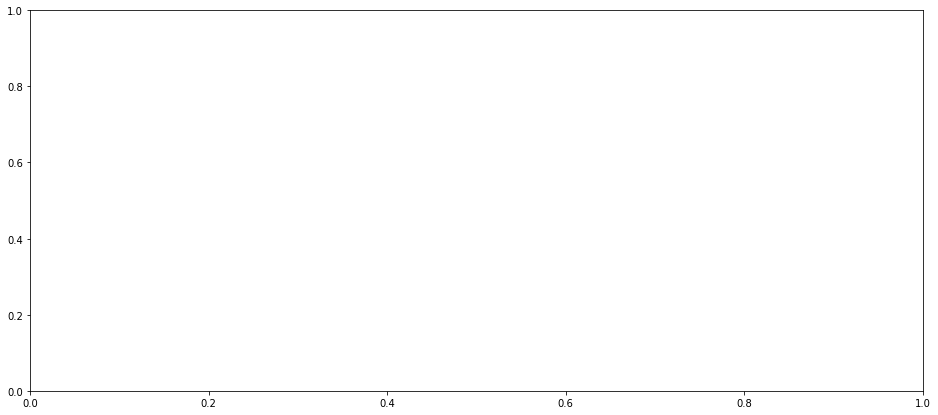

In [35]:
from sklearn.cluster import KMeans
def kmeansClustering(X, clusters = 5):
    kmeans = KMeans(n_clusters = clusters)
    y_kmeans = kmeans.fit_predict(X)
    return y_kmeans
labels = kmeansClustering(datewise_sol3.iloc[:, [2,3,4]].values, 5)
print(labels)
drawClusters(datewise_sol3, datewise_sol3.iloc[:, [3,4,2]].values, labels, "K-Means Clustering", "recovered", "deceased")

5 clusters of States where the COVID-19 situation is similar in nature

In [52]:
covid19_data_cumulative_df_sol4 = copy_covid19_data_cumulative_df_sol3
# Add a new column named 'Active' 
covid19_data_cumulative_df_sol4.loc[:,'Active'] = covid19_data_cumulative_df_sol4['Confirmed'] - covid19_data_cumulative_df_sol4['Deceased'] - covid19_data_cumulative_df_sol4['Recovered']
options = ['AP', 'AR', 'AS', 'BR', 'CT', 'DN', 'GA', 'GJ', 'HR', 'HP', 'JH', 'KA', 'KL', 'MP', 'MH', 'MN', 'ML', 
           'MZ', 'NL', 'OR', 'PB', 'RJ', 'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN']
covid19_data_cumulative_df_sol4 = covid19_data_cumulative_df_sol4.loc[covid19_data_cumulative_df_sol4['State'].isin(options)]
covid19_data_cumulative_df_sol4.to_csv("state_without_UN_daily_active_cumulative_2020_05_25_active.csv")
covid19_data_cumulative_df_sol4 = pd.read_csv("state_without_UN_daily_active_cumulative_2020_05_25_active.csv")
temp = covid19_data_cumulative_df_sol4[["State", "Active", "Confirmed", "Recovered", "Deceased"]]
state = temp["State"]
covid19_data_k_means = covid19_data_cumulative_df_sol4[["Active", "Confirmed", "Recovered", "Deceased"]]

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(covid19_data_k_means)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster column to the Dataset
covid19_data_k_means['cluster'] = cluster
#Mean of clusters
covid19_kmeans_mean_cluster = pd.DataFrame(round(covid19_data_k_means.groupby('cluster').mean(),1))
covid19_kmeans_mean_cluster

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Active,Confirmed,Recovered,Deceased
cluster,,,,
1,2910.7,6885.3,3762.3,212.3
2,35187.0,52667.0,15786.0,1694.0
3,142.4,265.8,121.0,2.4
4,7588.0,15775.0,7683.5,503.5
5,1342.2,2462.8,1058.8,61.8


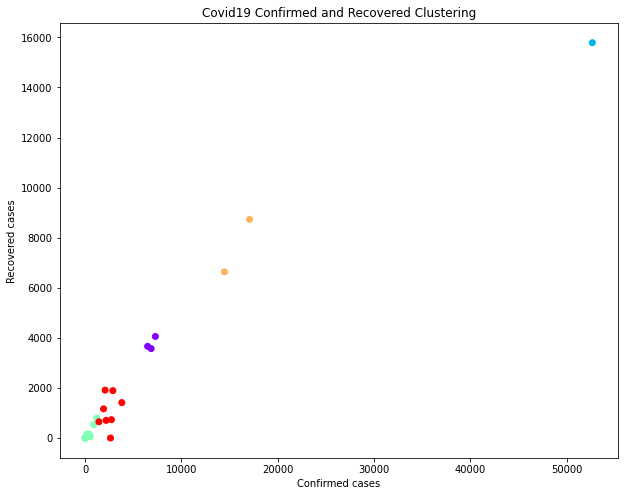

In [54]:
plt.figure(figsize=(10, 8))
# plot points with cluster dependent colors
plt.scatter(covid19_data_k_means.iloc[:,1], covid19_data_k_means.iloc[:,2],c=y_kmeans, cmap='rainbow')  
plt.title('Covid19 Confirmed and Recovered Clustering')
plt.xlabel("Confirmed cases")
plt.ylabel("Recovered cases")
plt.show()

In [55]:
data_risk= pd.DataFrame()
data_risk["State"] = temp["State"]
data_risk["Cluster"] = y_kmeans1

In [56]:
for group in range(1,6):
    clusters = data_risk.loc[data_risk['Cluster'] == group]
    list_states = list(clusters['State'])
    print("Group", group, ":", list_states)

Group 1 : ['MP', 'RJ', 'UP']
Group 2 : ['MH']
Group 3 : ['AR', 'AS', 'CT', 'DN', 'GA', 'HP', 'HR', 'JH', 'KL', 'ML', 'MN', 'MZ', 'NL', 'SK', 'TR', 'UT']
Group 4 : ['GJ', 'TN']
Group 5 : ['AP', 'BR', 'KA', 'OR', 'PB', 'TG', 'UN', 'WB']


In [57]:
covid19_data_k_means["State"] = state

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
covid19_data_k_means.set_index("State", inplace=True)

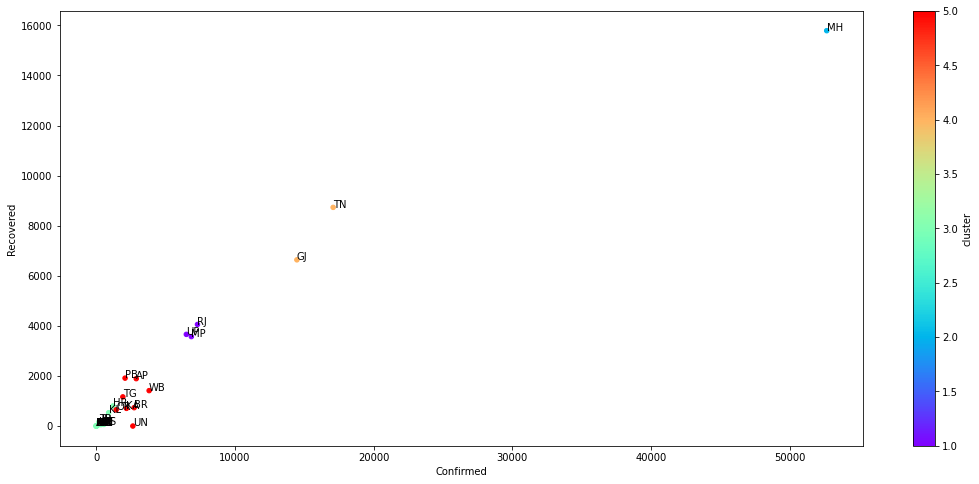

In [59]:
fig, ax = plt.subplots()
covid19_data_k_means.plot('Confirmed', 'Recovered', kind='scatter', c="cluster", ax=ax, figsize=(18,8),cmap='rainbow')
for k, array in covid19_data_k_means.iterrows():
    ax.annotate(k, [array[:][1],array[:][2]])
fig.canvas.draw()

Sol 5. Create the 5 clusters of states including UTs using the data as on 25-May-2020

In [60]:
covid19_data_cumulative_df_sol5 = copy_covid19_data_cumulative_df_sol3
# Add a new column named 'Active' 
covid19_data_cumulative_df_sol5.loc[:,'Active'] = covid19_data_cumulative_df_sol5['Confirmed'] - covid19_data_cumulative_df_sol5['Deceased'] - covid19_data_cumulative_df_sol5['Recovered']
covid19_data_cumulative_df_sol5.to_csv("state_wise_daily_active_cumulative_2020_05_25_active.csv")
covid19_data_cumulative_df_sol5 = pd.read_csv("state_wise_daily_active_cumulative_2020_05_25_active.csv")
temp = covid19_data_cumulative_df_sol5[["State", "Active", "Confirmed", "Recovered", "Deceased"]]
state = temp["State"]
covid19_data_k_means = covid19_data_cumulative_df_sol5[["Active", "Confirmed", "Recovered", "Deceased"]]




In [61]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(covid19_data_k_means)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)
# Adding cluster column to the Dataset
covid19_data_k_means['cluster'] = cluster
#Mean of clusters
covid19_kmeans_mean_cluster = pd.DataFrame(round(covid19_data_k_means.groupby('cluster').mean(),1))
covid19_kmeans_mean_cluster

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Active,Confirmed,Recovered,Deceased
cluster,,,,
1,1286.0,2374.4,1031.0,57.4
2,35187.0,52667.0,15786.0,1694.0
3,7394.0,15201.0,7379.3,427.7
4,108.9,211.5,100.7,1.9
5,2910.7,6885.3,3762.3,212.3


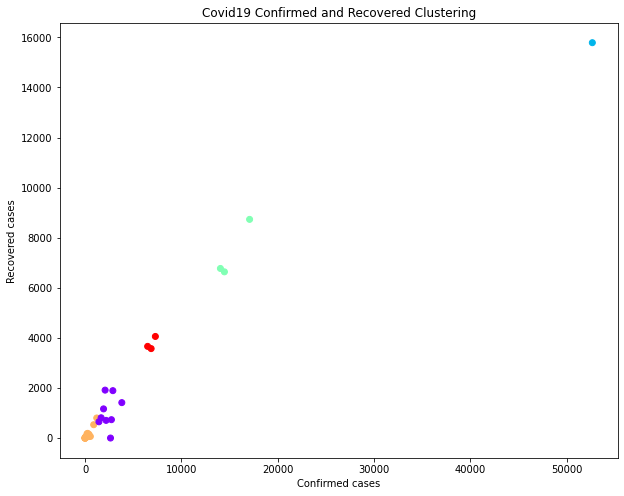

In [62]:
plt.figure(figsize=(10, 8))
# plot points with cluster dependent colors
plt.scatter(covid19_data_k_means.iloc[:,1], covid19_data_k_means.iloc[:,2],c=y_kmeans, cmap='rainbow')  
plt.title('Covid19 Confirmed and Recovered Clustering')
plt.xlabel("Confirmed cases")
plt.ylabel("Recovered cases")
plt.show()

In [63]:
data_risk= pd.DataFrame()
data_risk["State"] = temp["State"]
data_risk["Cluster"] = y_kmeans1

In [64]:
for group in range(1,6):
    clusters = data_risk.loc[data_risk['Cluster'] == group]
    list_states = list(clusters['State'])
    print("Group", group, ":", list_states)

Group 1 : ['AP', 'BR', 'JK', 'KA', 'OR', 'PB', 'TG', 'UN', 'WB']
Group 2 : ['MH']
Group 3 : ['DL', 'GJ', 'TN']
Group 4 : ['AN', 'AR', 'AS', 'CH', 'CT', 'DD', 'DN', 'GA', 'HP', 'HR', 'JH', 'KL', 'LA', 'LD', 'ML', 'MN', 'MZ', 'NL', 'PY', 'SK', 'TR', 'UT']
Group 5 : ['MP', 'RJ', 'UP']


In [65]:
covid19_data_k_means["State"] = state

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
covid19_data_k_means.set_index("State", inplace=True)

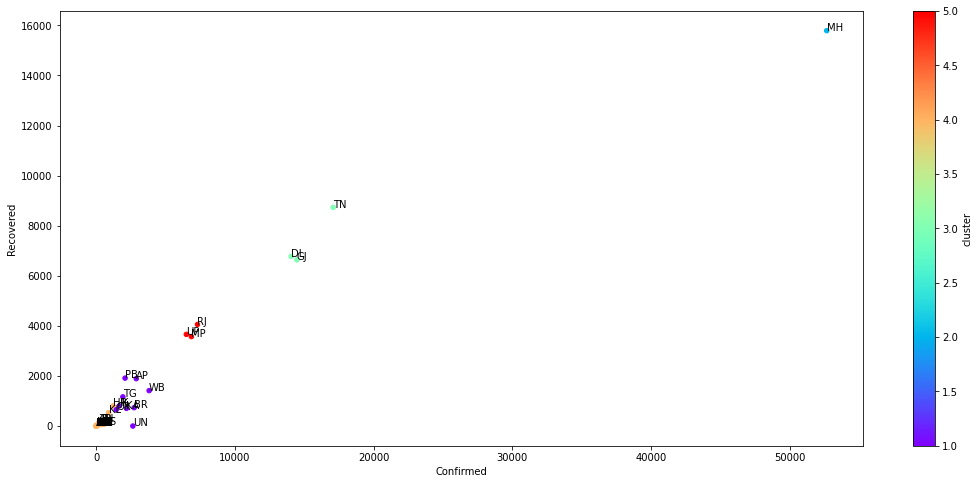

In [67]:
fig, ax = plt.subplots()
covid19_data_k_means.plot('Confirmed', 'Recovered', kind='scatter', c="cluster", ax=ax, figsize=(18,8),cmap='rainbow')
for k, array in covid19_data_k_means.iterrows():
    ax.annotate(k, [array[:][1],array[:][2]])
fig.canvas.draw()

In [68]:
import warnings
warnings.simplefilter('ignore', np.RankWarning)

In [69]:
covid19_data_df_sol7 = copy0_covid19_data_df

In [70]:
# Group different cases(Confirmed, Recovered and Deceased) as per Date
covid19_data_df_sol7=covid19_data_df_sol7.groupby(["Date","State"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deceased":'sum'})

In [71]:
covid19_data_df_sol7 = covid19_data_df_sol7.groupby(by =['State', 'Date']).sum().groupby(level=[0]).cumsum()

In [72]:
covid19_data_cumulative_df_sol7.loc[:, 'Active'] = covid19_data_cumulative_df_sol7['Confirmed'] - covid19_data_cumulative_df_sol7['Deceased'] -covid19_data_cumulative_df_sol7['Recovered']

NameError: ignored

In [ ]:
import numpy as np
from datatime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

def predictCovidPeak(covid19JsonData, forDays=150, forState = 'TT', precision = 2, maxDegree = 8):
    df = pd.DataFrame(covid19JsonData).where(lamda x: x.state == forState).dropna()
    x = []
    for i in range (0, len(df.Date)):
        x.append(i)
    bestScore = 100
    bestDegree = 3
    while True:
        mymodel= np.poly1d(np.polyfit(x, df.Active, maxDegree))
            if bestScore >= round(r2_score(df.Active, mymodel(x)), precision) or bestDegree > maxDegree:
                break
            else:
                bestScore = r2_score(df.active, mymodel(x))
                bestDegreee = bestDegree +1
    y = []
    z = []
    dateLabels = []
    dt = datetime.strptime(str(pd.DataFrame(covid19JsonData).where(lambda x: x.state == forState.dropna().date.tolist()[0]), %Y-%m-%d)
    step = timedelta(days=1)
        
    for i in range (0, forDays):
        estimate = mymodel(i)
        print(estimate)
        if estimate >= -1000:
            y.append(dt.strftime('%Y-%m-%d'))
            if i % 3 == 0:
                dataLabels.append(dt.strftime('%Y-%m-%d'))
            else:
                dataLabels.append('')
            dt += step
            x.append(estimate)
        else:
            break
                             
    plt.figure(figuresize=(16, 8))
    india = np.arange(len(dataLabels))
    plt.xticks(india, dataLabels, rotation= 'vertical')
    plt.plot(x, df.active.toList(), color = 'orange', linewidth=7)
    plt.plot(y, z)
    plt.title("Covid 19 active cased peak prediction for India = "  + forState)
    plt.show()
        
predictCovidPeak(covid19_data_df_sol3_Confirmed, forDays=80, forState='TT', precision=2, maxDegree=8)   